# Assignment 1: PCA

## Note
* Use Google Colab to do this assignment. (File > Open in playground mode)
* Don't change existing code or text.
* Add code and write text as instructed.

## Submission
* File > Download > (as .ipynb)
* Submit .ipynb file on the Learn.  

## Submission Notes
(Please write any notes here that you think we should know during marking)

Group members: Zhiqi Bei, Wenhan Liu

# [NO MARKS] PCA Warming Up (MUST READ)

Some code to illustrate examples of PCA using sklearn library.

**Let's create some random `5d` data**

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# 100 points of 5d data
data = np.random.rand(100, 5)

**Lets convert this `5d` data to `2d` using `PCA`**


In [ ]:
# n_components=2 because I want to convert 5d data to 2d i.e, d=5 and k=2 based on the notation in Tutorial.
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In code above when we call `fit`, it populates two things in `pca`:
1. `mean_`
2. `components_`

In [ ]:
# mean of the input data (per dimension) used to zeroying the mean
pca.mean_

array([0.47972705, 0.47420379, 0.48586583, 0.52244563, 0.48632899])

In [ ]:
# basis vectors: k by d projection marix (this is the transposed of projection matrix based on notation in the Tutorial.)
pca.components_

array([[ 0.41455494,  0.56048359,  0.68695888, -0.06307786, -0.19522048],
       [ 0.67445177,  0.17314403, -0.50473045, -0.42048842,  0.28908928]])

Now we are ready to transform `5d` from `data` into `2d` using following code

In [ ]:
data_to_reduce = data[:10]
reduced_data = np.dot(data_to_reduce - pca.mean_, pca.components_.T)

# reduced data from 5d to 2d
reduced_data.shape

(10, 2)

You can accomplish the same using `transform` function provided in `pca`

In [ ]:
pca.transform(data_to_reduce).shape

(10, 2)

Time for inverse transform or changing `2d` data back to `5d`

Compression --> Decompression

In [ ]:
decompressed_data = np.dot(reduced_data, pca.components_)+pca.mean_
decompressed_data

array([[0.35631995, 0.19404153, 0.03251023, 0.49246503, 0.63750616],
       [0.2083172 , 0.23943041, 0.32639448, 0.6206169 , 0.50558639],
       [0.62028911, 0.57934028, 0.53232464, 0.46452413, 0.48986711],
       [0.58715852, 0.4555274 , 0.3038826 , 0.43556376, 0.57036634],
       [0.16241247, 0.09309089, 0.06524166, 0.59133868, 0.5964177 ],
       [0.87117197, 0.58179584, 0.20852052, 0.28145395, 0.64828151],
       [0.85149737, 0.61287894, 0.30260048, 0.30926818, 0.61017232],
       [0.56768112, 0.57899774, 0.60060217, 0.50298655, 0.45650739],
       [0.35747148, 0.6381177 , 1.00626727, 0.68270136, 0.27353134],
       [0.69036677, 0.73772231, 0.78820628, 0.48124324, 0.40460329]])

In [ ]:
# same can we accomplished using inverse_transform
pca.inverse_transform(pca.transform(data_to_reduce))

array([[0.35631995, 0.19404153, 0.03251023, 0.49246503, 0.63750616],
       [0.2083172 , 0.23943041, 0.32639448, 0.6206169 , 0.50558639],
       [0.62028911, 0.57934028, 0.53232464, 0.46452413, 0.48986711],
       [0.58715852, 0.4555274 , 0.3038826 , 0.43556376, 0.57036634],
       [0.16241247, 0.09309089, 0.06524166, 0.59133868, 0.5964177 ],
       [0.87117197, 0.58179584, 0.20852052, 0.28145395, 0.64828151],
       [0.85149737, 0.61287894, 0.30260048, 0.30926818, 0.61017232],
       [0.56768112, 0.57899774, 0.60060217, 0.50298655, 0.45650739],
       [0.35747148, 0.6381177 , 1.00626727, 0.68270136, 0.27353134],
       [0.69036677, 0.73772231, 0.78820628, 0.48124324, 0.40460329]])

In [ ]:
# Lets find compression decompression error (absolute mean error)
np.sum(np.abs(data_to_reduce - decompressed_data))/data_to_reduce.size

0.17298433450259817

# PCA 


## Problem 1: PCA objective function [35 marks]


## 1-a) [10 marks]
Show that minimizing the reconstruction loss in PCA i.e,

\begin{equation}
\begin{aligned}
& \underset{\mathbf{W}}{\text{arg min}} &&   \| \mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T \| ^2_F,  \quad \mathbf{W}^T \mathbf{W}=\mathbf{I}_k, \quad (1)
\end{aligned}
\end{equation}

is equivalent to maximizing variance in all orthogonal projection directions i.e,

$$
\underset{\mathbf{W}}{\text{arg max}} \quad \textrm{Tr}\{\mathbf{W}^{T}\mathbf{X}^{T}\mathbf{X}\mathbf{W}\}\quad
\textrm{s.t.} \quad  \mathbf{W}^T \mathbf{W}=\mathbf{I}_k, \quad (2)
$$
where $ \textrm{Tr}$ is trace function, $\| .\|_F$ is frobenius norm, $\mathbf{X}$ is $n$ by $d$ data matrix ($n$ number of data points and $d$ dimensionality), $\mathbf{W}$ is a $d$ by $k$  projection matrix, and $\mathbf{I}_k$ is $k$ by $k$ identity matrix.

Hint 1: Try to expand the frobenus norm in relation (1) and note that $\mathbf{W}^T \mathbf{W}=\mathbf{I}_k$.

Hint 2: In order to show this you may use Trace of a product and Cyclic property of the Trace function. You can read about Cyclic property of Trace function [here](https://en.wikipedia.org/wiki/Trace_(linear_algebra)). <br>
<br>


Answer to 1-a):

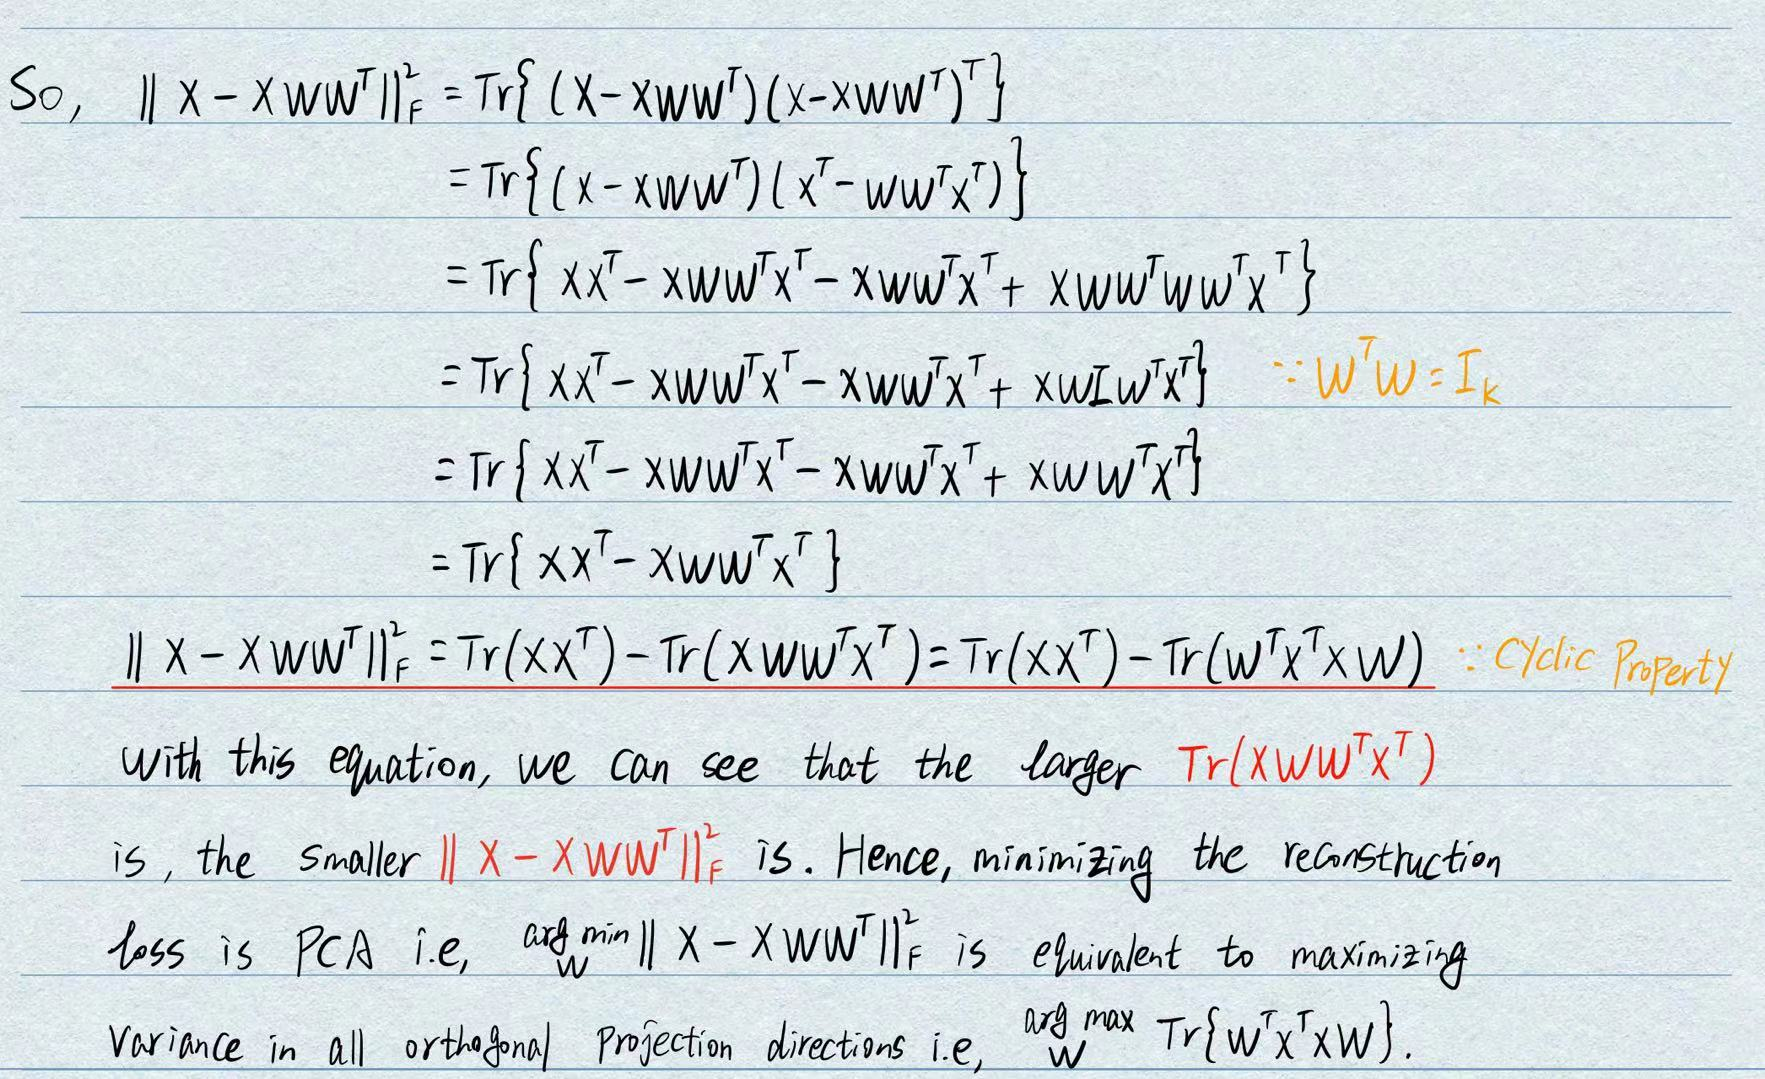

## 1-b) [10 marks]
Show that projection matrix in PCA i.e, $\mathbf{W}$ is rotation invariant .
Hint: You need to show that if we replace $\mathbf{W}$ with $\mathbf{W}\mathbf{R}$ where $\mathbf{R}$ is a $k$ by $k$ rotation matrix (rotation matrix is a square orthohonal matrix such that $\mathbf{R}^T\mathbf{R}=\mathbf{R}\mathbf{R}^T=\mathbf{I}_k$) then the objective value in relation (2) is the same.

Hint: In order to show this you may use Trace of a product and Cyclic property of the Trace function. You can read about Cyclic property of Trace function [here](https://en.wikipedia.org/wiki/Trace_(linear_algebra)).

Answer to 1-b):

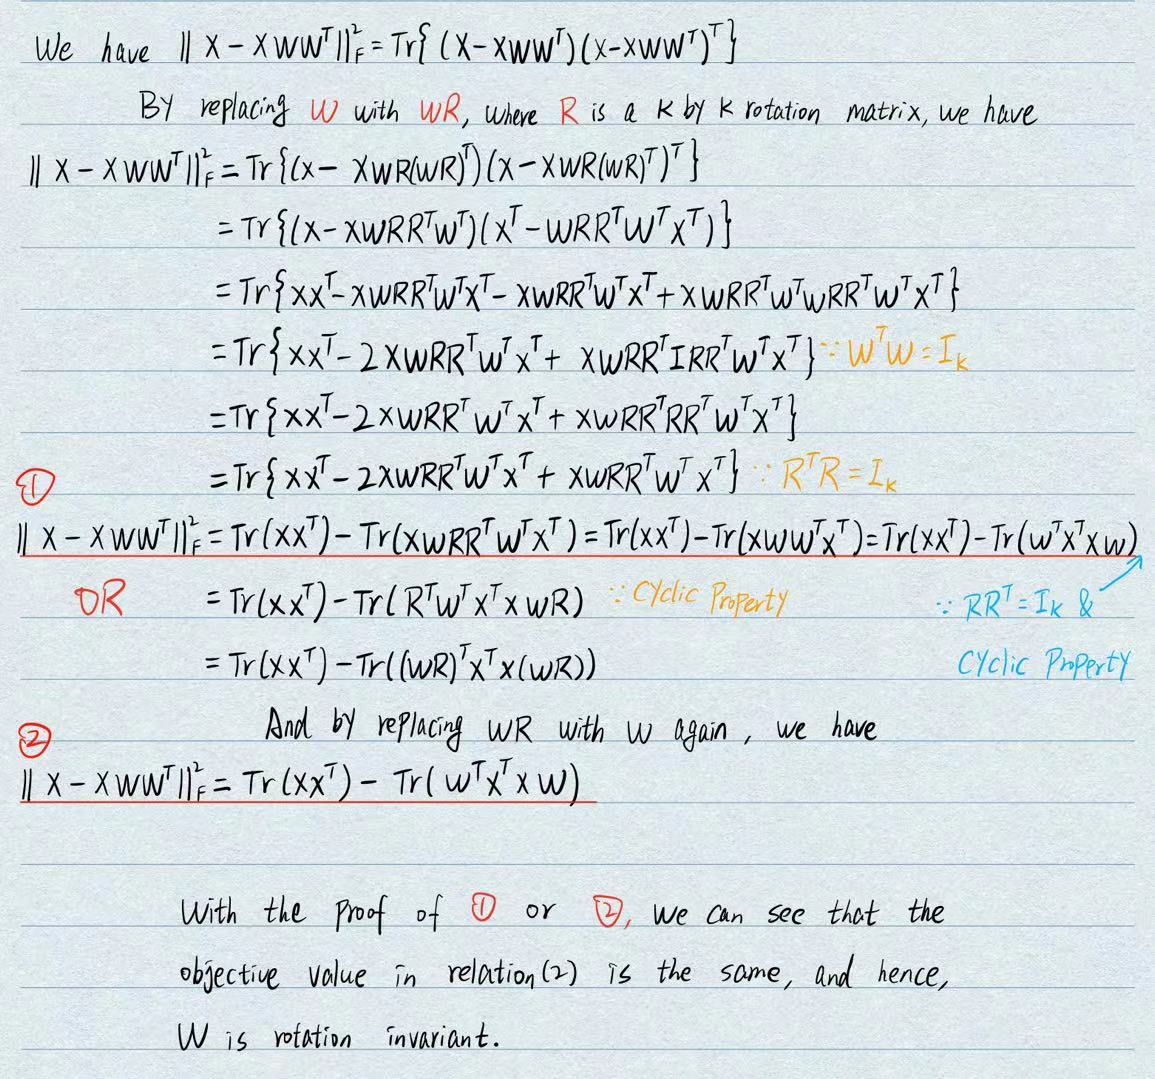

## 1-c) [10 marks] 
Assume we have the data matrix 
$\mathbf{X}$ $n$ by $d$  ($n$ number of data points and $d$ dimensionality), and the projection martix $\mathbf{W}$ ($d$ by $k$) from PCA algorithm. Explain in detail how we can use this $\mathbf{W}$ to denoise $\mathbf{X}$? <br>

write the mathematical exparession for calcuating the denoised data and explain role of $k$ in denoising.

Answer to 1-c): To denoise X, multiple X with W, so that the resulting nxk matrix (denoted as X') is X that reduction from d dimension to k dimension (some noise has removed). Since we need to get X without noise, the next step is reconstruct the X' to original dimension(nxd) using X'W^T(X' multiply )

## 1-d) [5 marks] 
For a $d$ dimensional data, you can ALWAYS reconstruct the data with 0\% error if all $d$ PCAs are used. In other words if we set $k$ equal to $d$ in the relation (1) we can obtain a $\mathbf{W}$ such that the reconstruction loss $\| \mathbf{X}-\mathbf{X}\mathbf{W}\mathbf{W}^T \| ^2_F$ is zero.

- True
- False

*Answer* to 1-d): True

## Problem 2: Visualize eigenvectors in face dataset: Eigenfaces [35 marks]

We know that $k$ columns of projection matrix $\mathbf{W}$ where $\mathbf{W}$ is $d$ by $k$ ($d$ original dimenionality and $k$ dimensionality of projected data) or equally top $k$ eigenvectors associated with $k$ largest eigenvalues of covariance matrix show projection directiond with highest variances. <br>

In this question, we want to apply PCA on face dataset and visulize the the columns of projection matrix (principal components) as face images.



The following code load the face dataset:

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.images.shape)

(1348, 62, 47)


Clearly there are 1348 images each with the size of (62,47). The following code plot the first 7 images in this dataset:

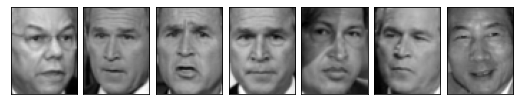

In [ ]:
# Plot the images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(faces.images[i], cmap='binary_r')

## 2-a) [5 marks]
Use reshpe metod to reshpe this data from (1348, 62, 47)
to (1348, 2914) such that X is the reshaped data:


In [ ]:
#write your code here to reshape the data
X = faces.images.reshape(len(faces.images),-1)
X.shape

(1348, 2914)

## 2-b) [5 marks]
Import PCA from sklearn and fit your model on X dataset using 150 principal components.

In [ ]:
# write your code here
pca = PCA(n_components=150)
pca.fit(X)

PCA(n_components=150)

##2-c) [5 marks]
The components_ attribute return the projection matrix in $k$ by $d$ format i.e, each row is an eigenvector. Choose the first eigenvector of the covariance matrix (first row in of projection matrix extracted by components_ attribute), this should be a 1 by $d$ (here 1 by 2914) vector.

Try to reshape it to a (62 by 47) matrix and visualize it as a grey scalse image.

Hint: use plt.imshow("your image here", cmap='bone') to visualize this eigenvector (eigenface).

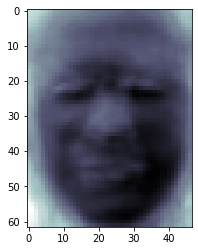

In [ ]:
# Write you code here
first = pca.components_[0]
first = first.reshape(62,47)

plt.imshow(first,cmap='bone')

##2-d) [5 marks]
Please explain your intuition about the viuslized eigenvector as an image in 2-3 lines. What does it mean? What does it look like?

Write your answer to 2-d here:
It is the first principal components, which means it has the maximum variance, so that it will contains the most obvious feature of the face, therefore, only a blurred outline of the face can be seen in the above image.

## 2-e) [5 marks]
Use plt.subplots to visualize the first 50 eigenfaces. Visualize them in a 5 by 10 array of eigenfaces using subplots.

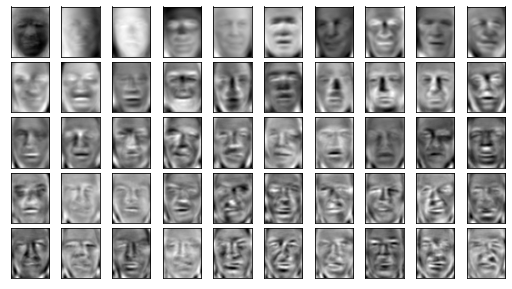

In [ ]:
# write your code here to Plot the first 50 eigenfaces
fig, ax = plt.subplots(5, 10, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
ax = ax.flatten()
for i in range(50):
    face = pca.components_[i]
    face = face.reshape(62,47)
    ax[i].imshow(face,cmap='binary_r')


## 2-f) [5 marks]
Repeat part 2-b but this time with 1348 components. Then
use plt.subplots to visualize the **last** 50 eigenfaces. Visualize them in a 5 by 10 array of eigenfaces.

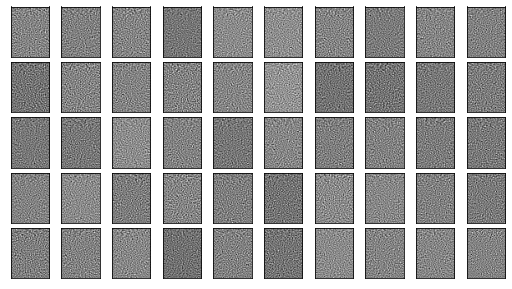

In [ ]:
# write your code here to Plot the last 50 eigenfaces
pca_2 = PCA(n_components=1348)
pca_2.fit(X)

fig, ax = plt.subplots(5, 10, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
ax = ax.flatten()
for i in range(50):
    face = pca_2.components_[1348-50+i]
    face = face.reshape(62,47)
    ax[i].imshow(face,cmap='binary_r')

##2-g) [5 marks]
Please explain your intuition about the viuslized eigenfaces in 2-3 lines. what do they mean? why do they looklike?

Write your answer to 2-g here:
It is the last 50 principal components, which means it has the least 50th variance, so that they will contain least information, therefore, it's hard to get information from those images above

## Problem 3: Denoising by PCA [10 marks]

Run the following cell to load and visualize the faces again:

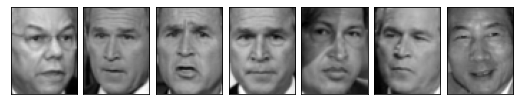

In [ ]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

faces = fetch_lfw_people(min_faces_per_person=60)
# Plot the images
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(faces.images[i], cmap='binary_r')

Use reshpe metod to reshpe this data from (1348, 62, 47)
to (1348, 2914) such that X is the reshaped data:


In [ ]:
#write your code here to reshape the data
X = faces.images.reshape(faces.images.shape[0], -1)
X.shape

(1348, 2914)

##3-a) [5 marks]
Generate a random matrix sampled from normal distribution with mean equal to 1 and standard deviation equal to 20 with the size of X. Name this matrix noise and add this to the X to get noisy_X. Then run the cell to visualize some of the noisy images.

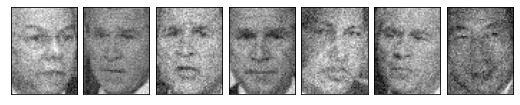

In [ ]:
# write your code here
my_mean = 1
my_std = 20
noise= np.random.normal(loc=my_mean, scale=my_std, size=(X.shape))
noisy_X= noise + X
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(noisy_X[i].reshape(62, 47), cmap='binary_r')

##3-b) [2.5 marks]
Denose the images using PCA algorithm. Choose $k$ such that 80 % of variance in data is captured. name the denoised data "filtered".

In [ ]:
# write the denoising code here name the denoised data "filtered"
pca = PCA(n_components=0.8)
pca.fit(noisy_X)

filtered = pca.inverse_transform(pca.transform(noisy_X))

Run the next cell to visualize some of the denoised images.

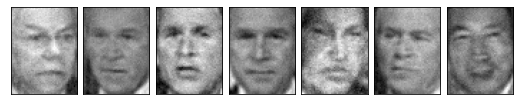

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(filtered[i].reshape(62, 47), cmap='binary_r')

##3-c) [2.5 marks]
Repeat 3-b with the  $k$ that it captures 40 % of variance in data and then visiualize the first 7 denoised images. Compare the results of 3-c with 3-b and write your conclusion in 2-3 lines.

In [ ]:
# write the denoising code here name the denoised data "filtered"
pca = PCA(n_components=0.4)
pca.fit(noisy_X)

filtered = pca.inverse_transform(pca.transform(noisy_X))

Run the next cell to visualize some of the denoised images.

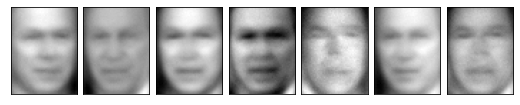

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(9, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(7):
    ax[i].imshow(filtered[i].reshape(62, 47), cmap='binary_r')

Write your conclusion here:

By comparing the difference of the results of 3b and 3c, we can see that the denoised images from 3c are much more blurry than denoised images of 3b, and a lot details are lost. As 3c used much less principle components and captures only 40% of variance, it didn't do as good as 3b, which used more principle components and maintained more details.

## Problem 4: tSNE [10 marks]

**Note:** Since tSNE is not covered in the lecture/tutorials, we are simply 
asking you to explore tSNE algorithm implemented in sklearn. You do not
need to implement tSNE alorithm.

In the following the digit dataset is loaded. The images and corresponsing labels are loaded in data and label variables

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
data=digits.data
label=digits.target
print(data.shape)
print(label.shape)

(1797, 64)
(1797,)


Use PCA and tSNE to obtain two-dimensional repesentations for this dataset. Use plt.scatter function to plot the 2-D representation of this dataset obtained by both PCA and tSNE method. Use labe information to assign distinct colors for data points in different classes. Based on the generated graphs, which one is a better method for visualization?

In [ ]:
# Write your code to apply PCA here
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data)

reduced_data = pca.transform(data)

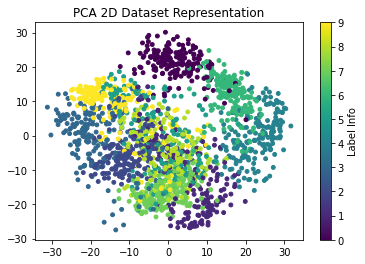

In [ ]:
# Write your code to plot the scatter plot for 2-D represntation obtained from PCA here
import matplotlib.pyplot as plt

size = 15
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], size, c=label)
plt.title("PCA 2D Dataset Representation")
color = plt.colorbar()
color.set_label("Label Info")
plt.show()

In [ ]:
# Write your code to apply TSNE here
# use TSNE functionality in sklearn.
# Hint: check sklearn.manifold.TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate='auto').fit_transform(data)

tsne.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(1797, 2)

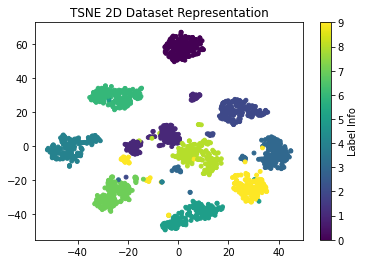

In [ ]:
# Write your code to plot the scatter plot for 2-D represntation obtained from TSNE here
import matplotlib.pyplot as plt

size = 15
plt.scatter(tsne[:, 0], tsne[:, 1], size, c=label)
plt.title("TSNE 2D Dataset Representation")
color = plt.colorbar()
color.set_label("Label Info")
plt.show()

Wrtie your conclusion about employing PCA and tSNE for data visualization

From the above experiment, we can see that by using tSNE, the result dataset would have data points of the same class being close to each other, and the scatter plot shows a better clustering of the data points by using tSNE, while the result of using PCA is rather messy, all the different data points are tangled together. So we can see that in this case, the use of tSNE would be a better choice.

## Problem 5: LDA [10 marks]
In the following the digit dataset once again is loaded. The data points and corresponsing labels are loaded in X and y variables

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X=digits.data
y=digits.target

Use PCA and LDA to obtain two-dimensional repesentations for this dataset. Use plt.scatter function to plot the 2-D representation of this dataset obtained by both PCA and LDA methods. Use labe information to assign distinct colors for data points in different classes. Based on the generated graphs, which 2-D representation is more discriminative?

In [ ]:
# Write your code to apply PCA here
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data)

reduced_data = pca.transform(data)

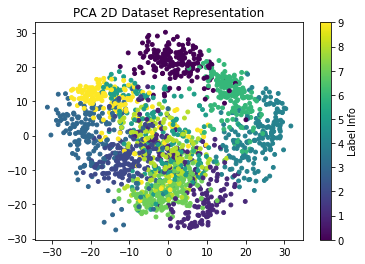

In [ ]:
# Write your code to plot the scatter plot for 2-D represntation obtained from PCA here
import matplotlib.pyplot as plt

size = 15
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], size, c=label)
plt.title("PCA 2D Dataset Representation")
color = plt.colorbar()
color.set_label("Label Info")
plt.show()

In [ ]:
# Write your code to apply LDA here
# Hint: Use LinearDiscriminantAnalysis from sklearn.discriminant_analysis to apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
result_lda = lda.fit_transform(X, y)

result_lda.shape

(1797, 2)

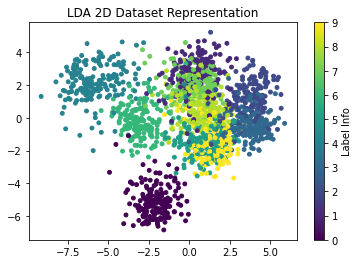

In [ ]:
# Write your code to plot the scatter plot for 2-D represntation obtained from LDA here
import matplotlib.pyplot as plt

size = 15
plt.scatter(result_lda[:, 0], result_lda[:, 1], size, c=label)
plt.title("LDA 2D Dataset Representation")
color = plt.colorbar()
color.set_label("Label Info")
plt.show()

Wrtie your conclusion about employing PCA and LDA for data dimensionality reduction

Based on the generated graphs, we can see the graph generated by LDA is more discriminative. As the data points with the same color are closer to each other, and we can see in the graph, most data points are clustered by their class(color) and each class group is more dense and data points of the same class are much closer to each other than PCA's graph. So for the PCA graph, although the datapoints are sort of clustered by their class(color), there are 5~6 classes of data points mixed together, and it's rather hard to separate them. Hence, LDA is more discriminative than PCA.